In [15]:
images1 = ['/content/generated_1.jpg', '/content/generated_2.jpg']
images2 = ['/content/original_1.jpg', '/content/original_2.jpg']


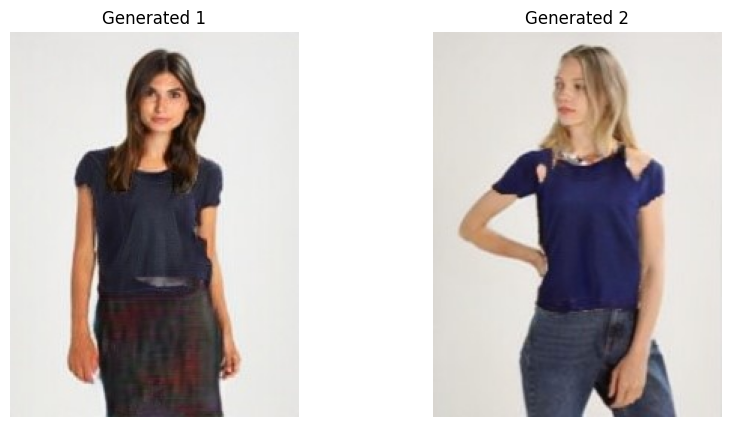

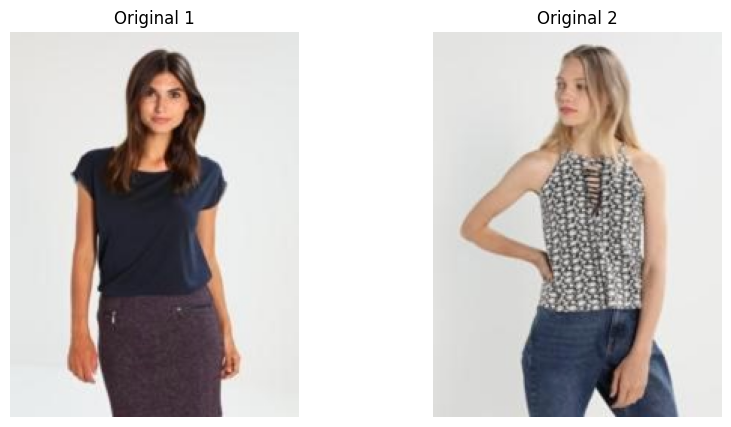

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to open and plot images
def plot_images(image_paths, titles):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(10, 5))

    for i, (image_path, title) in enumerate(zip(image_paths, titles)):
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(title)
        axes[i].axis('off')

    plt.show()

# Image paths and corresponding titles
images1 = ['/content/generated_1.jpg', '/content/generated_2.jpg']
titles1 = ['Generated 1', 'Generated 2']

images2 = ['/content/original_1.jpg', '/content/original_2.jpg']
titles2 = ['Original 1', 'Original 2']

# Plot images from images1
plot_images(images1, titles1)

# Plot images from images2
plot_images(images2, titles2)

In [17]:
import numpy as np
from numpy import cov, trace
from numpy import iscomplexobj
from numpy import asarray
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import array_to_img

# scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        # load image
        img = load_img(image, target_size=new_shape)
        # convert to numpy array
        img_array = img_to_array(img)//255
        # reshape array
        img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
        # preprocess image for InceptionV3
        img_array = preprocess_input(img_array)
        # store
        images_list.append(img_array)
    return np.vstack(images_list)


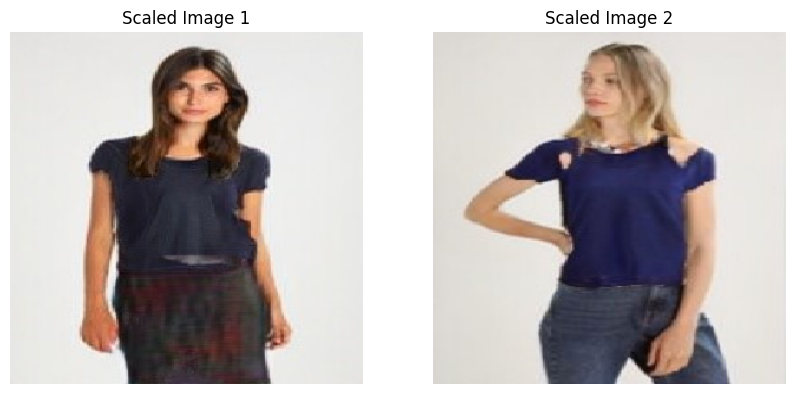

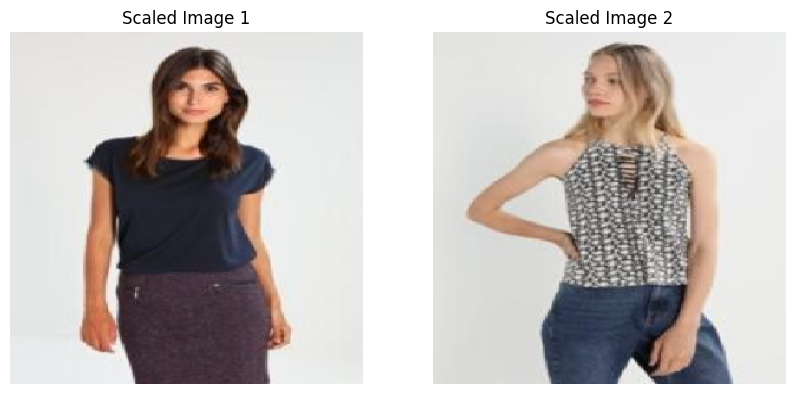

In [18]:
import numpy as np
from numpy import cov, trace
from numpy import iscomplexobj
from numpy import asarray
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

# scale an array of images to a new size and plot them
def scale_and_plot_images(images, new_shape):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5))

    for i, image_path in enumerate(images):
        # load image
        img = load_img(image_path, target_size=new_shape)
        # convert to numpy array
        img_array = img_to_array(img) / 255.0
        # reshape array
        img_array = img_array.reshape((new_shape[0], new_shape[1], 3))
        # plot image
        axes[i].imshow(img_array)
        axes[i].set_title(f'Scaled Image {i+1}')
        axes[i].axis('off')

    plt.show()

# load images
images1 = ['/content/generated_1.jpg', '/content/generated_2.jpg']
images2 = ['/content/original_1.jpg', '/content/original_2.jpg']

# scale images and plot them
new_shape = (299, 299)
scale_and_plot_images(images1, new_shape)
scale_and_plot_images(images2, new_shape)


In [19]:
# load images
images1 = ['/content/generated_1.jpg', '/content/generated_2.jpg']
images2 = ['/content/original_1.jpg', '/content/original_2.jpg']

# scale images and preprocess
images1 = scale_images(images1, (299,299))
images2 = scale_images(images2, (299,299))

In [20]:
images1.mean()

-0.9999988

In [21]:
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1)
    mu2, sigma2 = act2.mean(axis=0), cov(act2)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid


In [22]:
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

1/1 [==============================] - 0s 467ms/step
FID: 0.161


In [23]:
from skimage import io
import numpy as np
import random

def dice_coefficient(image1, image2):
    intersection = np.logical_and(image1, image2)
    return 2.0 * intersection.sum() / (image1.sum() + image2.sum())

# Load images
images1 = [io.imread('/content/generated_1.jpg'), io.imread('/content/generated_2.jpg')]
images2 = [io.imread('/content/original_1.jpg'), io.imread('/content/original_2.jpg')]

# Binarize images
binary_images1 = [img > 0 for img in images1]
binary_images2 = [img > 0 for img in images2]

# Calculate Dice scores
dice_scores = [dice_coefficient(img1, img2) for img1, img2 in zip(binary_images1, binary_images2)]

# Print Dice scores
for i, score in enumerate(dice_scores):
    print(f"Dice score for image {i+1}: {score}")

Dice score for image 1: 0.9998609070893282
Dice score for image 2: 0.999972872344033


In [24]:
Averagedicescore = np.mean(dice_scores)
Averagedicescore

0.9999168897166806

In [34]:
from numpy import asarray, expand_dims, log, mean, exp
from PIL import Image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import numpy as np

# Load the InceptionV3 model pretrained on ImageNet
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

# Function to preprocess images
def preprocess_images(image_paths):
    processed_images = []
    for img_path in image_paths:
        img = Image.open(img_path)
        img = img.resize((299, 299))
        img = np.array(img)
        img = expand_dims(img, axis=0)
        img = preprocess_input(img)
        processed_images.append(img)
    return np.vstack(processed_images)

# calculate the inception score for p(y|x)
def calculate_inception_score(p_yx, eps=1E-16):
    # calculate p(y)
    p_y = expand_dims(p_yx.mean(axis=0), 0)
    # kl divergence for each image
    kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
    # sum over classes
    sum_kl_d = kl_d.sum(axis=1)
    # average over images
    avg_kl_d = mean(sum_kl_d)
    # undo the logs
    is_score = exp(avg_kl_d)
    return is_score

# Calculate Inception Score for the provided images
images1 = ['/content/generated_1.jpg', '/content/generated_2.jpg']
processed_images = preprocess_images(images1)

# Predictions from the model
preds = model.predict(processed_images)

# Convert logits to probabilities
p_yx = np.exp(preds) / np.exp(preds).sum(axis=1, keepdims=True)

# Calculate Inception Score
score = calculate_inception_score(p_yx)
print("Inception Score:", score)

1/1 [==============================] - 2s 2s/step
Inception Score: 1.0162383
